MovieWriter imagemagick unavailable; using Pillow instead.


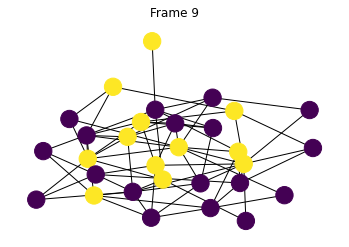

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation


def simple_update(num, n, layout, G, ax):
    ax.clear()

    # Draw the graph with random node colors
    random_colors = np.random.randint(2, size=n)
    nx.draw(G, pos=layout, node_color=random_colors, ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(num))


def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout
    n = 30 # Number of nodes
    m = 70 # Number of edges
    G = nx.gnm_random_graph(n, m)
    layout = nx.spring_layout(G)

    ani = animation.FuncAnimation(fig, simple_update, frames=10, fargs=(n, layout, G, ax))
    ani.save('animation_1.gif', writer='imagemagick')

    plt.show()

simple_animation()

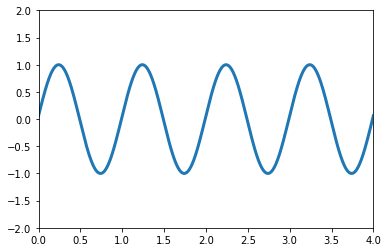

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
   
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 4), 
                ylim =(-2, 2)) 
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,
   
def animate(i):
    x = np.linspace(0, 4, 1000)
   
    # plots a sine graph
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
      
    return line,
   
anim = FuncAnimation(fig, animate, init_func = init,
                     frames = 200, interval = 20, blit = True)
  
   
anim.save('continuousSineWave.mp4', writer = 'ffmpeg', fps = 30)

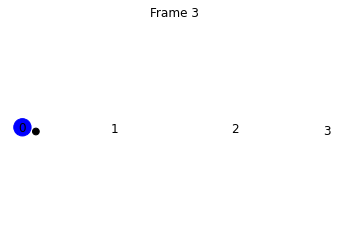

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation


def simple_update(frame_num, G, ax, path):

    ax.clear()
    ax.axis('equal') #force the x and y axes to have equal number of pixels per data unit (makes circles be round)

    label = nx.get_node_attributes(G, 'label')
    pos = nx.get_node_attributes(G, 'pos')
    color_map = []
    for node in G:
        if node != path[frame_num]:
            color_map.append('white')
        else: 
            color_map.append('blue')
            position = pos[node]
            x = position[0]
            y = position[1]
            ax.add_patch(plt.Circle((x+0.16, y-0.05), radius = 0.04, color='black'))
            if (frame_num != 0):
                G.remove_edge(path[frame_num-1], path[frame_num])
    nx.draw(G, pos=pos, labels=label, with_labels=True, node_color=color_map, ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(frame_num))


def simple_animation():

    # Build plot
    fig, ax = plt.subplots()

    # Create a graph
    G = nx.Graph()
    G.add_node(0, label = '0', pos = (-1.81, 0.02))
    G.add_node(1, label = '1', pos = (-0.72, -0.00))
    G.add_node(2, label = '2', pos = (0.72, 0.00))
    G.add_node(3, label = '3', pos = (1.81, -0.02))
    G.add_edge(0,1)
    G.add_edge(1,2)
    G.add_edge(2,3)

    path = [3,2,1,0]

    ani = animation.FuncAnimation(fig, simple_update, interval = 400, frames=4, fargs=(G, ax, path)) #interval in milliseconds(default 200)
    ani.save('test.gif', writer='ffmpeg')

    plt.show()

simple_animation()

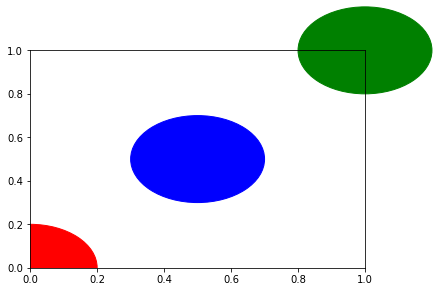

In [5]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0, 0), 0.2, color='r')
circle2 = plt.Circle((0.5, 0.5), 0.2, color='blue')
circle3 = plt.Circle((1, 1), 0.2, color='g', clip_on=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

fig.savefig('plotcircles.png')